In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#This section 
#Try to implement feature selection
#Bruteforce with different set of features
#Drop the pick, drop date time columns
#Drop Nan values 202 rows


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/content/gdrive/My Drive/ML Project Taxi Fair/train.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [ ]:
#Drop the NaN and tripid
df.drop(columns=['tripid'], inplace=True)

In [ ]:
df.dropna(subset=['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare'], inplace=True)

In [ ]:
#Convert labels for 1 and 0
#Before do describe, Let's convert the label as 1 and 0 .(1-correct and 0-incorrect)
def encoding_label(label):
  if(label=='correct'):
    return 1
  else:
    return 0

df['label']= df['label'].apply(encoding_label).values

In [ ]:
df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
1,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
2,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
3,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
5,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,1


In [ ]:
#Drop pickuptime and droptime
df.drop(columns=['pickup_time','drop_time'], inplace=True)

In [ ]:
#Select te best K features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df.drop(columns=['label']).values
Y = df['label'].values

def brutforce_best_k_fetures(k):
  test = SelectKBest(score_func=f_classif, k=k)

  fit = test.fit(X, Y)
  #print(fit.scores_)
  features = fit.transform(X)
  # summarize selected features
  return features


In [ ]:
#Train te models

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

def train_models(X_train, Y_train):
  models = []
  models.append(('LR', LogisticRegression(penalty="l2")))
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('CART', DecisionTreeClassifier()))
  models.append(('NB', GaussianNB()))
  #models.append(('SVM', SVC(gamma=0.05, kernel='linear')))
  # evaluate each model in turn
  results = []
  names = []
  for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
  print("-"*100)
  sns.lineplot(x=np.array(['LR','LDA','KNN','CART','NB']),y=[r.mean() for r in results])

No of features : # 4
LR: 0.956068 (0.001592)
LDA: 0.953010 (0.001494)
KNN: 0.970646 (0.001842)
CART: 0.957907 (0.003025)
NB: 0.953327 (0.001532)
----------------------------------------------------------------------------------------------------
No of features : # 5
LR: 0.956146 (0.001718)
LDA: 0.953454 (0.001280)
KNN: 0.971250 (0.002548)
CART: 0.958234 (0.002164)
NB: 0.952180 (0.002041)
----------------------------------------------------------------------------------------------------
No of features : # 6
LR: 0.956216 (0.001566)
LDA: 0.953572 (0.001252)
KNN: 0.971330 (0.002620)
CART: 0.954653 (0.002697)
NB: 0.952180 (0.002041)
----------------------------------------------------------------------------------------------------
No of features : # 7
LR: 0.956175 (0.001593)
LDA: 0.953647 (0.001225)
KNN: 0.969918 (0.001175)
CART: 0.954449 (0.004719)
NB: 0.952217 (0.002011)
----------------------------------------------------------------------------------------------------
No of features :

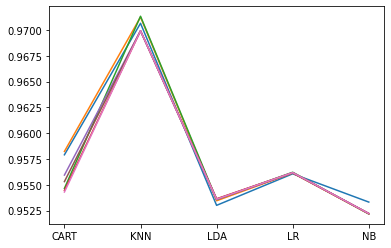

In [ ]:
for k in range(4,11):
  print("No of features : # {0}".format(k))
  X_ = brutforce_best_k_fetures(k)
  
  X_train, X_validation, Y_train, Y_validation = train_test_split(X_, Y, test_size=0.20, random_state=1)

  train_models(X_train, Y_train)

In [ ]:
#6 is te best no of features
#Find best columns
test = SelectKBest(score_func=f_classif, k=6)

fit = test.fit(X, Y)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features)

[ 28.62395344 220.02687922 197.90497428 183.41722761  21.46446935
  13.03015556  24.70095056   2.29617505  15.60186867 593.59727431]
[[  10.5     834.       56.        0.       79.8993  270.32  ]
 [  10.5     791.       47.        0.       79.8984  197.85  ]
 [  10.5    1087.       80.        0.       79.8651  301.64  ]
 ...
 [  10.5     263.        9.        0.       79.9      76.2   ]
 [  10.5     858.      115.        0.       79.8768  133.31  ]
 [  10.5     262.       21.        1.2243   79.9557   98.57  ]]


In [ ]:
columns = ['additional_fare','duration','meter_waiting','meter_waiting_fare','pick_lon','fare']

In [ ]:
#model_ = KNeighborsClassifier()
model_ = LogisticRegression(penalty="l2")
model_.fit(features, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Testing frame
test_frame = pd.read_csv("/content/gdrive/My Drive/ML Project Taxi Fair/test.csv")
trip_ids = test_frame['tripid']

#test_frame['pick_epoch'] = test_frame['pickup_time'].apply(timeToEpoch)
#test_frame['drop_epoch'] = test_frame['drop_time'].apply(timeToEpoch)

test_frame.drop(columns=['tripid','pickup_time','drop_time'], inplace=True)

X_test = test_frame[columns].values
predicted = model_.predict(X_test)

data_dict = { 'tripid':trip_ids, 'prediction':predicted}
pd_test_result = pd.DataFrame(data=data_dict)

pd_test_result.to_csv('/content/gdrive/My Drive/ML Project Taxi Fair/sample_submission.csv',index=False)

In [ ]:
#0.97427 was the best score using KNearest Neghbour
#Upload te same wit logistic regression, but low accuracy than K-NN 0.96624

In [ ]:
#Try to parameter tune KNN : algorithm

#Try grid search
model_ = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
parameters = {'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
clf = GridSearchCV(model_, parameters, scoring='f1')
clf.fit(X_train,Y_train)
clf.best_estimator_
print(clf.best_score_)

0.970714270475691


In [ ]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')